In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

## References
## https://github.com/MedMNIST/MedMNIST/blob/main/medmnist/dataset.py
## https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d


In [2]:
mycwd = os.getcwd()
# print(mycwd)
os.chdir("../..")
path_datasets_filename = os.getcwd()+'/datasets/MedMNISTv2/breastmnist.npz'
print(path_datasets_filename)

/home/mxochicale/repositories/mxochicale/diffusion-models-tutorials/datasets/MedMNISTv2/breastmnist.npz


In [3]:
npz_file = np.load(path_datasets_filename)

print(type(npz_file)) #lib.npyio.NpzFile
print(npz_file.keys())#KeysView(<numpy.lib.npyio.NpzFile object at 0x7f5ac597d9f0>)

train_imgs = npz_file['train_images']
train_labels = npz_file['train_labels']
#             self.imgs = npz_file['val_images']
#             self.labels = npz_file['val_labels']
#             self.imgs = npz_file['test_images']
#             self.labels = npz_file['test_labels']

len_train_labels = len(train_labels)

print(train_imgs.shape)#(546, 28, 28)
print(type(train_imgs))#<class 'numpy.ndarray'>

print(train_labels.shape)#(546, 1)
print(train_imgs.dtype) #uint8

# train_imgs_float32 = train_imgs.astype(np.float32)
# print(train_imgs_float32.dtype) #float32



<class 'numpy.lib.npyio.NpzFile'>
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f09257fbbb0>)
(546, 28, 28)
<class 'numpy.ndarray'>
(546, 1)
uint8


In [4]:

imagesTensor = torch.tensor(train_imgs)


###################
#####Transforms
toTensor = torchvision.transforms.ToTensor()
toPILImage = torchvision.transforms.ToPILImage()
# toResize = torchvision.transforms.Resize(image_size)
# toCenterCrop = torchvision.transforms.CenterCrop(image_size)
#toGraysacle = torchvision.transforms.Grayscale()


def scaleImage(x):
    #print(type(x)) #<class 'torch.Tensor'>
    #print(x.shape) #torch.Size([28, 28])

    if(x.min() < x.max()):  # Assuming the image isn't empty, rescale so its values run from 0 to 1
        x = (x - x.min())/(x.max() - x.min()) 
    z = x - x.mean()        # Subtract the mean value of the image
#     y = toTensor(y)
#     #y = toResize(y)
#     #y = toCenterCrop(y)
    
    return z

#imageTensor = torch.stack([scaleImage(Image.open(x)) for x in imageFilesList]) 

#TRIED
# https://pillow.readthedocs.io/en/stable/reference/ImageStat.html#PIL.ImageStat.Stat.mean

imageTensorX = torch.stack( [ scaleImage(x) for x in imagesTensor]  )
print(imageTensorX.shape)
print(type(imageTensorX))
#print(imageTensorX[0]) #...tensor([[ 0.2069,  0.2069,  0.2014,  0.2069,  0.2235,  0.2622,  0.3009,  0.3174,



torch.Size([546, 28, 28])
<class 'torch.Tensor'>


In [5]:


batch_class0 = []
batch_class1 = []

for idx in  range(0, len_train_labels):
    if train_labels[idx]==0:
        batch_class0.append(imageTensorX[idx])
    elif train_labels[idx]==1:
        batch_class1.append(imageTensorX[idx])
    else:
        print('no class')

batch_class0 = torch.stack(batch_class0, 0)
batch_class1 = torch.stack(batch_class1, 0)
print(f' batch_class0.shape {batch_class0.shape}')
print(f' batch_class1.shape {batch_class1.shape}')




 batch_class0.shape torch.Size([147, 28, 28])
 batch_class1.shape torch.Size([399, 28, 28])


In [6]:
#imagesTensor = batch_class0
imagesTensor = batch_class1
imagesTensor = torch.unsqueeze(imagesTensor, 0)
print(imagesTensor.shape)
imagesTensor = torch.permute(imagesTensor, (1, 0, 2, 3))
print(imagesTensor.shape)

# number_of_output_channels = 1
# transform = transforms.Grayscale(num_output_channels=number_of_output_channels)
# imagesTensorGray = transform(imagesTensor)
# print(imagesTensorGray.shape)#torch.Size([1080, 1, 28, 28])

print(imagesTensor.dtype)
number_of_images = imagesTensor.shape[0]
print(f' number_of_images: {number_of_images} ')

#print(imagesTensor[0]) #...tensor([[[ 0.2069,  0.2069,  0.2014,  0.2069,  0.2235,  0.2622,  0.3009,


torch.Size([1, 399, 28, 28])
torch.Size([399, 1, 28, 28])
torch.float32
 number_of_images: 399 


In [7]:
BATCH_SIZE=2
BATCHES_SIZE=number_of_images/BATCH_SIZE
dataloader = DataLoader(imagesTensor, batch_size=BATCH_SIZE, shuffle=True)
print(f'BATCHES_SIZE {BATCHES_SIZE} or len(dataloader) {len(dataloader)}')


BATCHES_SIZE 199.5 or len(dataloader) 200


batch_idx: 0;               sampled images in the batch: 0 of 399
    img.shape: torch.Size([2, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 62])


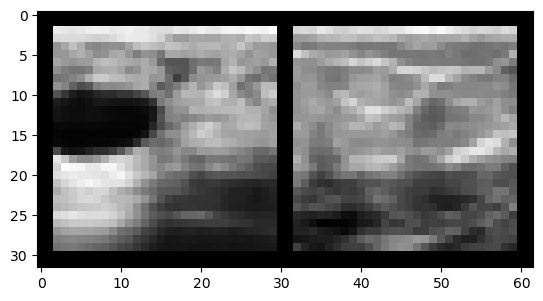

batch_idx: 50;               sampled images in the batch: 100 of 399
    img.shape: torch.Size([2, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 62])


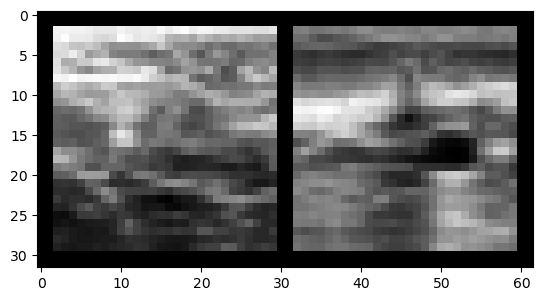

batch_idx: 100;               sampled images in the batch: 200 of 399
    img.shape: torch.Size([2, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 62])


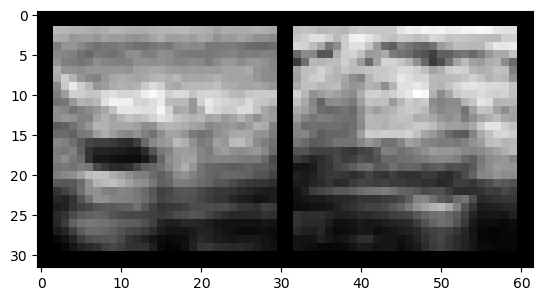

batch_idx: 150;               sampled images in the batch: 300 of 399
    img.shape: torch.Size([2, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 62])


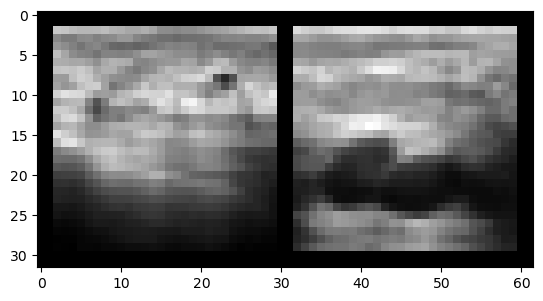

In [8]:
## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, batch in enumerate(dataloader):  #iterate through each batch    
    if batch_idx % 50 == 0:
        print(f'batch_idx: {batch_idx}; \
              sampled images in the batch: { batch_idx*BATCH_SIZE } of {number_of_images}')
        #print(batch.shape)
        img = batch
        print(f'    img.shape: {img.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        print(f'    img.dtype: {img.dtype}') #torch.Size([BATCH_SIZE, 1, 64, 64])

        grid_img = torchvision.utils.make_grid(img, normalize=True) #also (img, nrow=10)
        print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        plt.imshow(grid_img.permute(1, 2, 0)) 
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy()  ) 
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("float32")) 

        plt.show()


In [9]:
# ls -la

In [10]:
os.chdir(mycwd)    # go back where you came from